In [19]:
import torch
import numpy as np
from torch import nn
from torch.utils.data import TensorDataset, DataLoader


#利用pandas 讀取csv檔
import pandas as pd
df=pd.read_csv('~/Desktop/train.csv') #2010筆 (train:1340 test:670)
#df=pd.read_csv('~/Desktop/bias_paper_train_mle.csv')  #5615筆 train:3715 test:1900
#df=pd.read_csv('~/Desktop/bias_paper_train_delete.csv')  #5613筆 train:3714 test:1899
#df=pd.read_csv('~/Desktop/outgroup_paper_train_mle.csv') #5307筆 train:3538 test:1769
#df=pd.read_csv('~/Desktop/outgroup_paper_train_delete.csv') #5305筆 train:3535 test:1770

data=df.values


# 設置隨機種子
np.random.seed(25)
#講資料打亂
np.random.shuffle(data)

'''
#bias_paper_train.csv
X=data[:,[2,3,4,5,6,7]]
y=data[:,1]
'''


#~/Desktop/train.csv
#X=data[:,[49,53,54,56,58,61,62,63,64]]
#X=data[:,[49,53,54,56,58,61]]
X=data[:,[49,50,51,52,54,56,58,61,62,63,64]]
y=data[:,46]
#y=data[:,47]



i=0
data_num=603
X_train=np.delete(X, slice(data_num*i,data_num*(i+1)), axis=0)
X_test=X[data_num*i:data_num*(i+1)]
y_train=np.delete(y, slice(data_num*i,data_num*(i+1)), axis=0)
y_test=y[data_num*i:data_num*(i+1)]

print(X_train.shape)
print(X_test.shape)

(1407, 11)
(603, 11)


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


#創建隨機森林
rf= RandomForestRegressor(n_estimators=100,  max_depth=10, random_state=25)

# 在训练集上训练模型
rf.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = rf.predict(X_test)

# 输出均方误差
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.7556040613742576


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


y_pred = rf.predict(X_train)
# 计算均方根误差
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print("RMSE:", rmse)
# 计算R²分数
r2 = r2_score(y_train, y_pred)
print("R² Score:", r2)

y_pred = rf.predict(X_test)
# 计算均方根误差
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
# 计算R²分数
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

RMSE: 0.4403199046346386
R² Score: 0.8997965025745682
RMSE: 0.869254888611078
R² Score: 0.5823643187552571


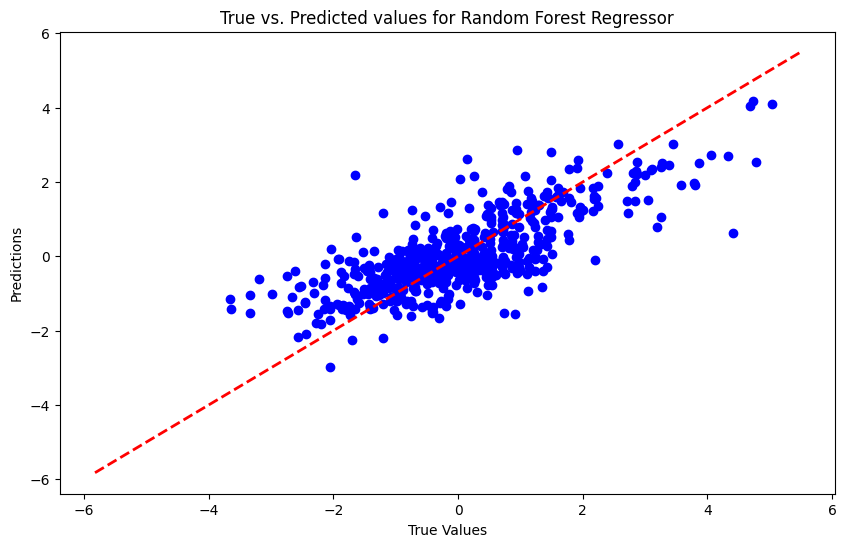

In [22]:
import matplotlib.pyplot as plt

y_pred = rf.predict(X_test)

# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], linestyle='--', color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs. Predicted values for Random Forest Regressor')
plt.show()


In [23]:
importances = rf.feature_importances_
print(importances)


[0.10148961 0.18389409 0.07688239 0.02608824 0.10836642 0.03330966
 0.0215606  0.3779858  0.02336302 0.02393998 0.02312019]


In [24]:
'''
from sklearn import tree
import matplotlib.pyplot as plt
import os
from pathlib import Path
from matplotlib.backends.backend_pdf import PdfPages

# 获取桌面路径
desktop_path = str(Path.home() / "Desktop")

# 创建一个PDF文件
pdf_path = os.path.join(desktop_path, 'rf_trees.pdf')
pdf_pages = PdfPages(pdf_path)

# 遍历每棵树并绘制保存为PDF文件的不同页面
for i, estimator in enumerate(rf.estimators_):
    plt.figure()
    tree.plot_tree(estimator, impurity=False, filled=True)
    pdf_pages.savefig()
    plt.close()

# 关闭PDF文件
pdf_pages.close()

print(f"All trees saved to {pdf_path}")
'''

'\nfrom sklearn import tree\nimport matplotlib.pyplot as plt\nimport os\nfrom pathlib import Path\nfrom matplotlib.backends.backend_pdf import PdfPages\n\n# 获取桌面路径\ndesktop_path = str(Path.home() / "Desktop")\n\n# 创建一个PDF文件\npdf_path = os.path.join(desktop_path, \'rf_trees.pdf\')\npdf_pages = PdfPages(pdf_path)\n\n# 遍历每棵树并绘制保存为PDF文件的不同页面\nfor i, estimator in enumerate(rf.estimators_):\n    plt.figure()\n    tree.plot_tree(estimator, impurity=False, filled=True)\n    pdf_pages.savefig()\n    plt.close()\n\n# 关闭PDF文件\npdf_pages.close()\n\nprint(f"All trees saved to {pdf_path}")\n'